# This jupyter notebook is prepared by Matthias Rathbun.

import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
%matplotlib inline

import the data to a dataframe and show how many rows and columns does it have (1 pt)

In [2]:
df = pd.read_csv("hrdata.csv", index_col = "rec_num")
df.shape

(21287, 17)

call the describe method of dataframe to see some summary statistics of the numerical columns. (1 pt)

In [3]:
df.describe()

,Unnamed: 0,enrollee_id,city_development_index,training_hours,target,city_development_matrics
count,21287.000000,21287.000000,21287.000000,21287.000000,19158.000000,21287.000000
mean,10643.000000,16873.983652,0.828462,65.328510,0.249348,8.284615
std,6145.171926,9612.131237,0.123537,60.075201,0.432647,1.235365
min,0.000000,1.000000,0.448000,1.000000,0.000000,4.480000
25%,5321.500000,8554.500000,0.739000,23.000000,0.000000,7.390000
50%,10643.000000,16967.000000,0.903000,47.000000,0.000000,9.030000
75%,15964.500000,25161.500000,0.920000,88.000000,0.000000,9.200000
max,21286.000000,33380.000000,0.949000,336.000000,1.000000,9.490000


Target is a categorical given by 0 and 1, but the number of values in target is less than the number of values in the rest of the column implying there are missing values. Probably need to drop those. the unnamed col is an index column which will be dropped as there is two index columns.


In [4]:
df = df.iloc[: , 1:]

Show the top 5 rows and last 5 rows of the data frame (1 pt)

In [5]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
rec_num,,,,,,,,,,,,,,,,
1,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,CA,9.20
2,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,CA,7.76
3,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,CA,6.24
4,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,CA,7.89
5,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,CA,7.67


In [6]:
df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
rec_num,,,,,,,,,,,,,,,,
21283,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,NaN,CA,9.20
21284,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,NaN,CA,8.97
21285,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,NaN,CA,8.87
21286,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,NaN,CA,8.04
21287,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11,NaN,CA,8.04


List all the numerical columns (1 pt) <br>
List all the categorial columns (1 pt)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 1 to 21287
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   enrollee_id               21287 non-null  int64  
 1   city                      21287 non-null  object 
 2   city_development_index    21287 non-null  float64
 3   gender                    16271 non-null  object 
 4   relevent_experience       21287 non-null  object 
 5   enrolled_university       20870 non-null  object 
 6   education_level           20775 non-null  object 
 7   major_discipline          18162 non-null  object 
 8   experience                21217 non-null  object 
 9   company_size              14727 non-null  object 
 10  company_type              14513 non-null  object 
 11  last_new_job              20824 non-null  object 
 12  training_hours            21287 non-null  int64  
 13  target                    19158 non-null  float64
 14  state 

Numeric Columns: city_development_index, training_hours, training_hours
Categorical: city, gender, relevent_experience, enrolled_university, educationn_level, major_discipline, experience, company size, company type, last new job, target( its just 1's and 0's so its categorical), state


Examine missing values: (2 + 2 + 2 + 5 = 11 pt) <br>
Show a list with column wise count of missing values and display the list in count wise descending order

In [8]:
df.isna().sum().sort_values(ascending = False)

company_type                6774
company_size                6560
gender                      5016
major_discipline            3125
target                      2129
education_level              512
last_new_job                 463
enrolled_university          417
experience                    70
enrollee_id                    0
city                           0
city_development_index         0
relevent_experience            0
training_hours                 0
state                          0
city_development_matrics       0
dtype: int64

Show a list with column wise percentage of missing values and display the list in percentage wise descending order

In [9]:
df.isna().mean().sort_values(ascending=False) * 100

company_type                31.822239
company_size                30.816931
gender                      23.563677
major_discipline            14.680321
target                      10.001409
education_level              2.405224
last_new_job                 2.175036
enrolled_university          1.958942
experience                   0.328839
enrollee_id                  0.000000
city                         0.000000
city_development_index       0.000000
relevent_experience          0.000000
training_hours               0.000000
state                        0.000000
city_development_matrics     0.000000
dtype: float64

Display a bar plot to visualize only the columns with missing values and their count. The plot should display from less missing value columns in the left and then more missing value columns to the right side of the plot

In [10]:
missing_values = df.isna().sum().sort_values().to_frame()
missing_values = missing_values.loc[~(missing_values==0).all(axis=1)]

In [11]:
missing_values.columns = ["count"]

In [12]:
missing_values.index.names = ["Name"]
missing_values['Name'] = missing_values.index


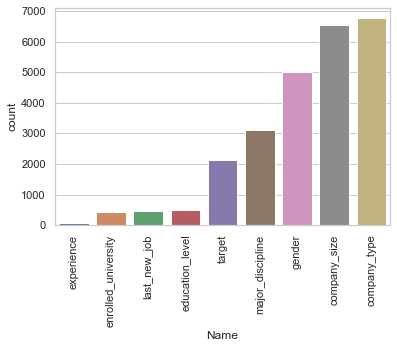

In [13]:
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90)
plt.show()

Use missingno’s bar plot, matrix plot with 200 sample, and heatmap. <br>
Interpret any interesting information you found in the heatmap and any one plot

<AxesSubplot:>

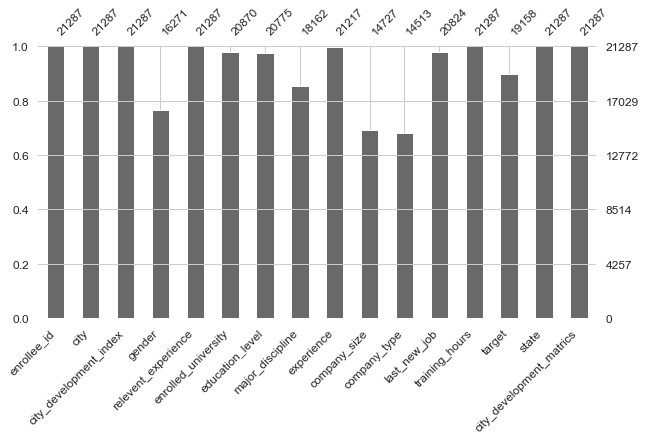

In [14]:
msno.bar(df, figsize=(10,5), fontsize=12)

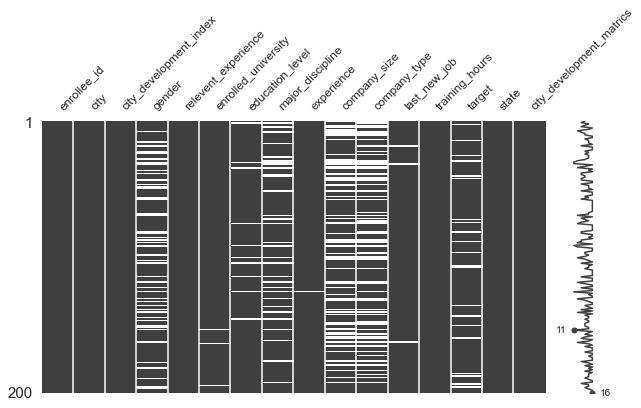

In [15]:
msno.matrix(df.sample(200),figsize=(10,5), fontsize=12);

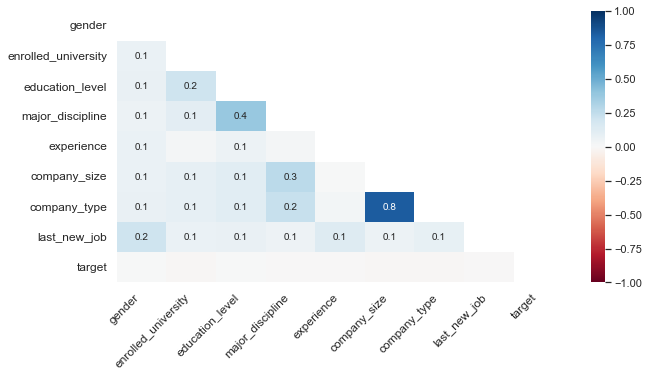

In [16]:
msno.heatmap(df, figsize=(10,5), fontsize=12);

The values we want to predict have some missing values, potential to separate. Also cols with massive missing values should be dropped as a whole as they are categorical and cannot be interpolated.

## Note to grader, I am using countplot for both as I can then pair each of the plots by variable they represent

Understanding Categorical attributes (this part may require you to make 20+ plots ) [26 pts] <br>
For each categorical attribute perform the following: <br>
Use seaborn bar plot for the categorical feature to see different values and count <br>
Use seaborn countplot for the categorical feature against the values of the target <br>

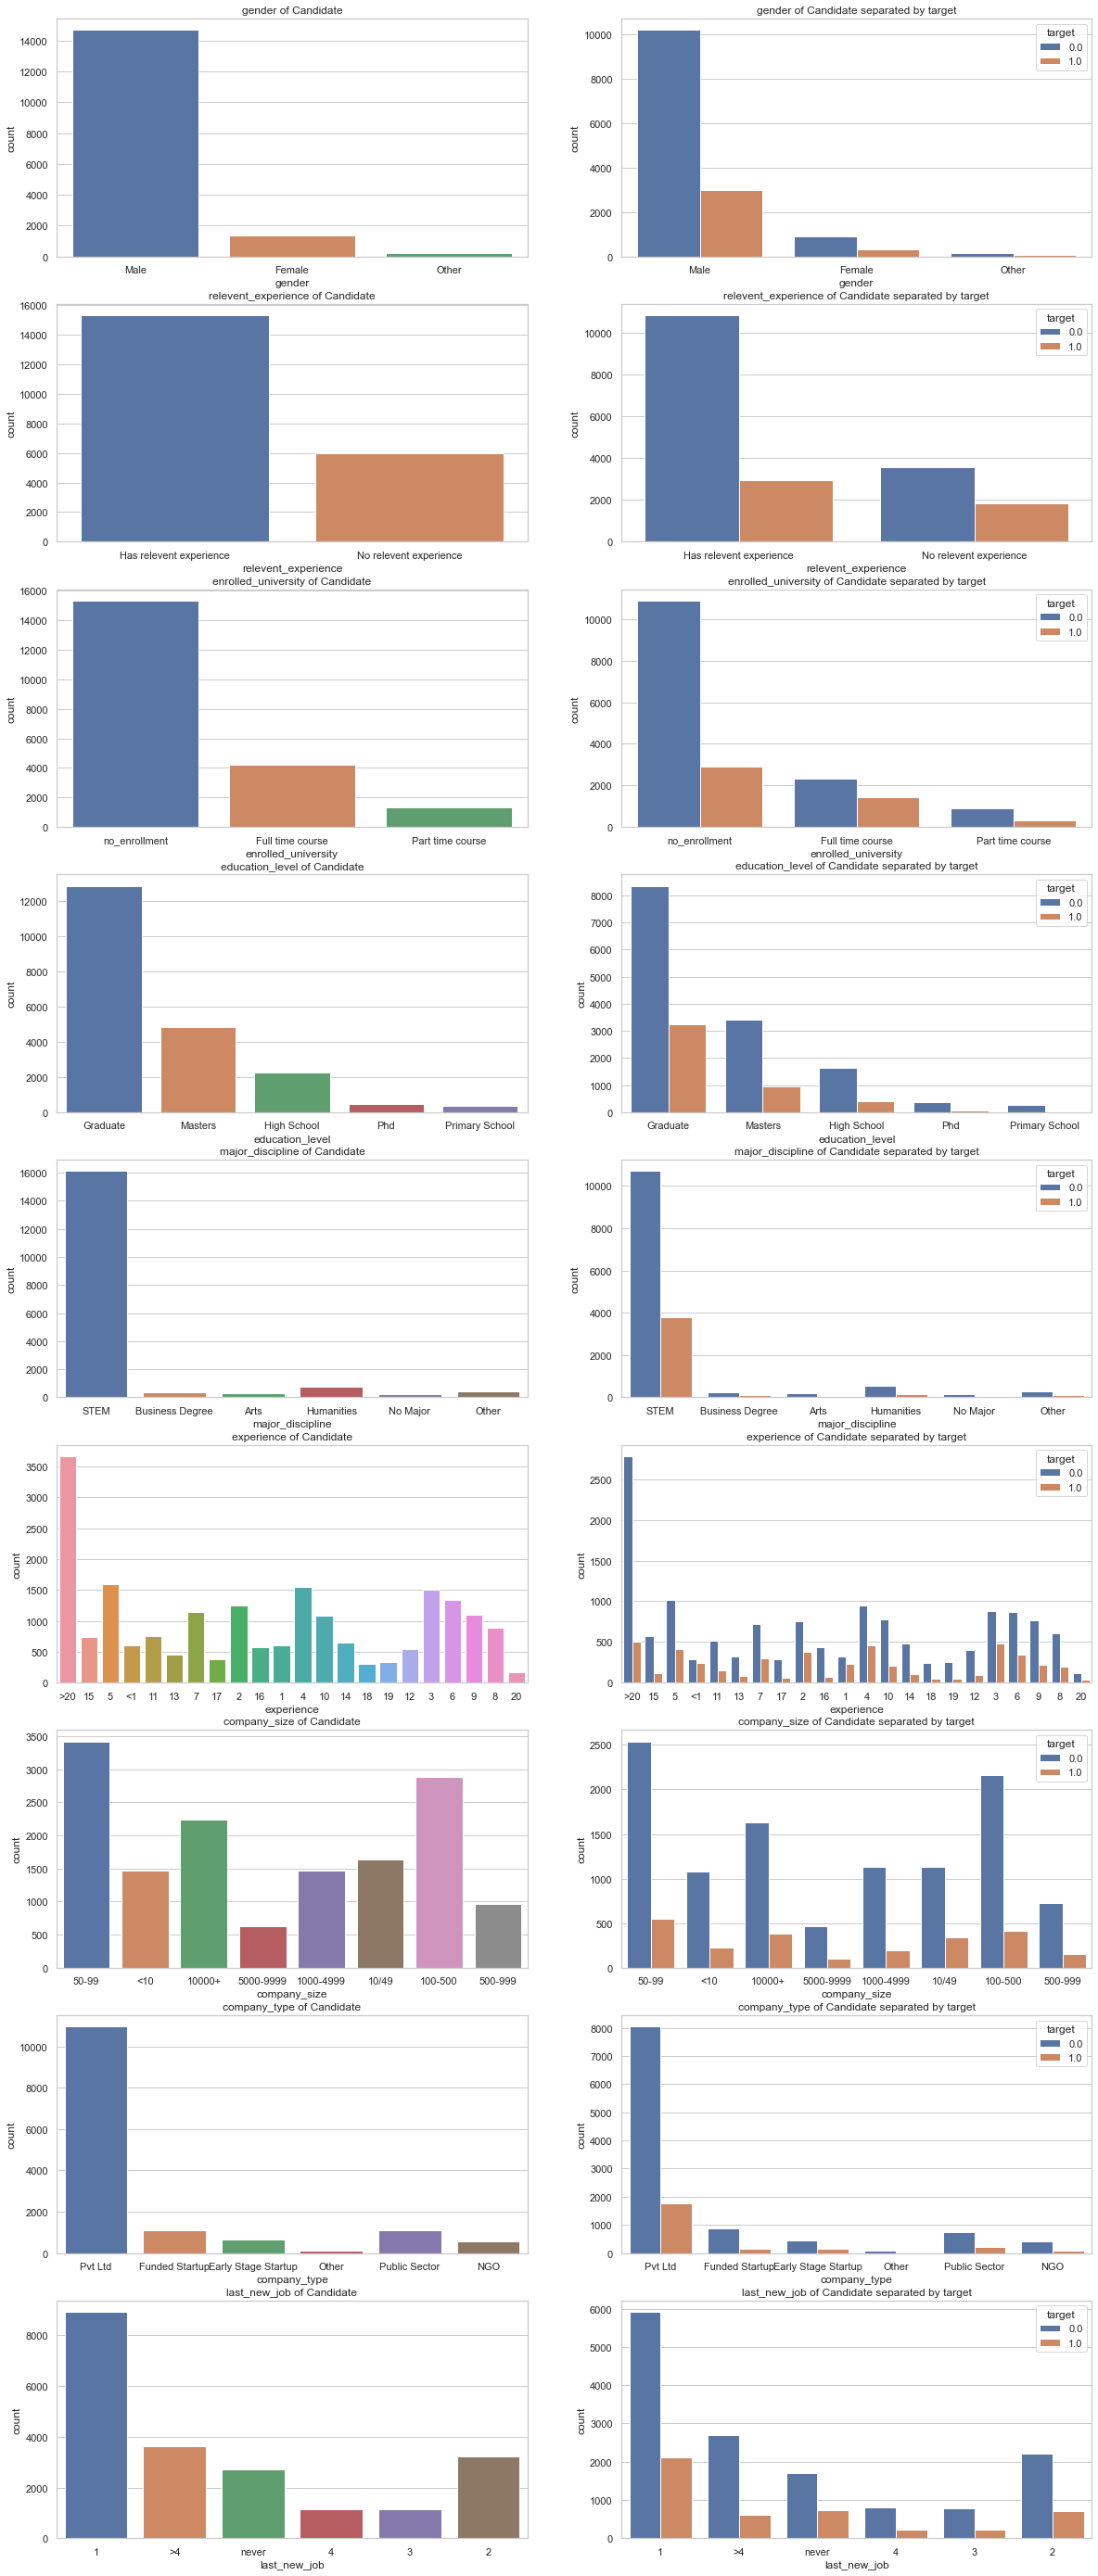

In [17]:
fig, axes = plt.subplots(9, 2, figsize=[20, 50])
cat_list = ["gender", "relevent_experience", "enrolled_university", "education_level", "major_discipline", "experience", "company_size", "company_type", "last_new_job"]
for row, var in enumerate(cat_list):
    sns.countplot(data = df, x = var, ax = axes[row, 0]).set(title = var + " of Candidate")
    sns.countplot(data = df, x = var, hue = "target", ax = axes[row, 1]).set(title = var + " of Candidate separated by target")

plt.show()

Understanding Numerical attributes (16 pts)
For each numerical features, perform the following:
Plot their distributions using histogram  (removed the group by word)
Plot the distribution using seaborn distplot
Interpret any interesting informationCity has way too many variables that should have no effect on the value of target. The only state was California so that should be dropped as well. There are a lot more college graduates than any other class, so the dataset may be skewed towards them. Also those with more than 20 years of experience represent a lot of the data. It seems that those with less experience are more willing to change jobs. Almost all are Stem degree holders, so it may be necessary to drop all non stem degrees as there isn't enough representation of them. Those in full time enrollment are also more likely to want to change jobs. Same with those with no relevant experience relative to those with relevant experience

Understanding Numerical attributes (16 pts) <br>
For each numerical features, perform the following: <br>
Plot their distributions using histogram  (removed the group by word)

array([[<AxesSubplot:title={'center':'enrollee_id'}>,
        <AxesSubplot:title={'center':'city_development_index'}>],
       [<AxesSubplot:title={'center':'training_hours'}>,
        <AxesSubplot:title={'center':'city_development_matrics'}>]],
      dtype=object)

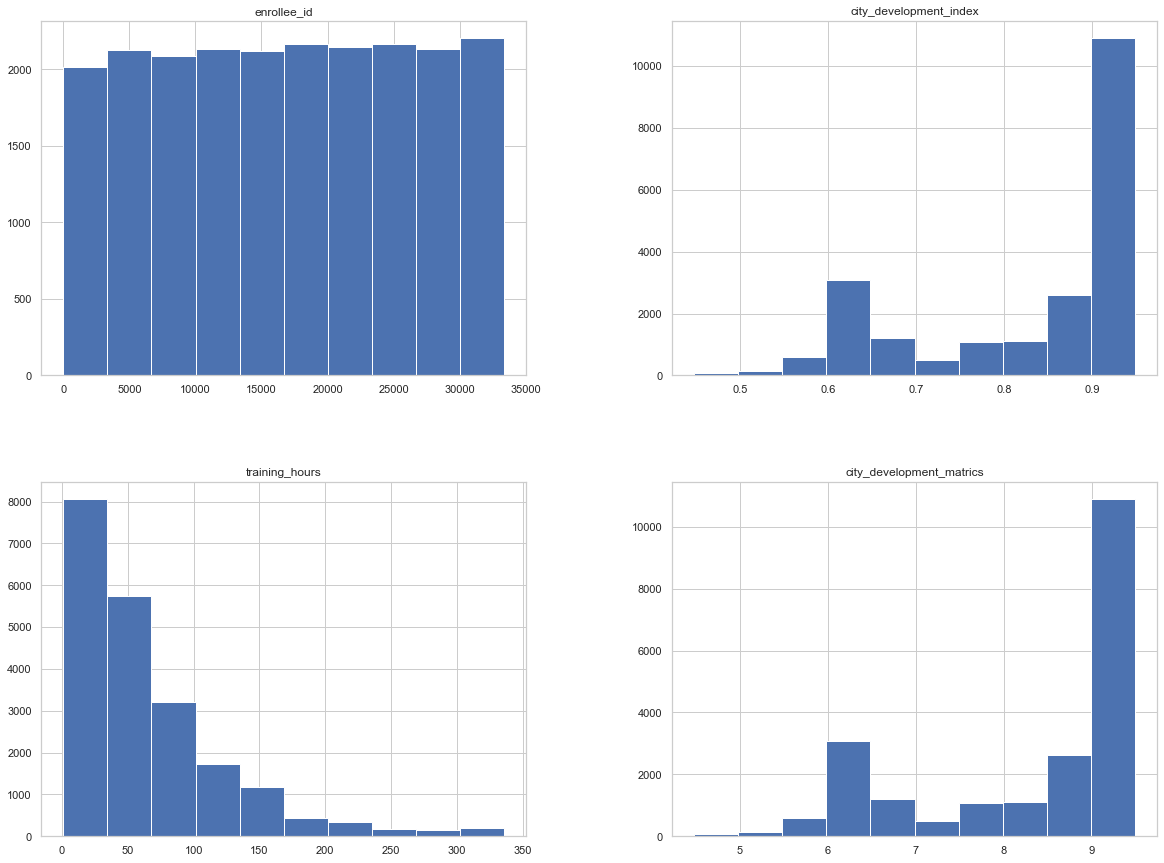

In [18]:
df.drop(columns = ["target"]).hist(figsize = (20,15))

## Note to grader: Histplot was used over dist plot so I could put both graphs in the same figure.

Plot the distribution using seaborn distplot

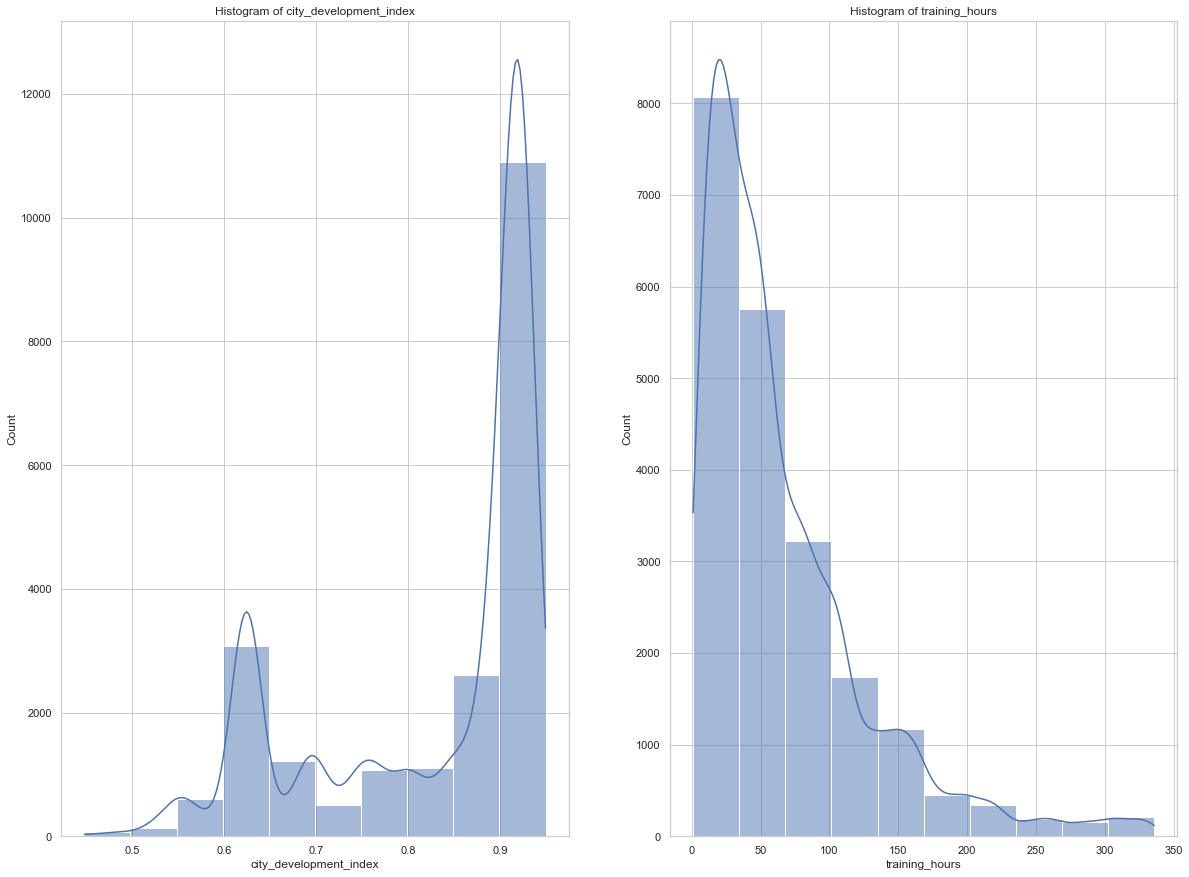

In [19]:
fig, axes = plt.subplots(1, 2, figsize=[20, 15])
dist_cols = ["city_development_index", "training_hours"]
for col, var in enumerate(dist_cols):
    sns.histplot(x = df[var], ax = axes[col], kde = True, bins = 10).set(title = "Histogram of " + var)

Plot the distribution using seaborn distplot <br>

Target was dropped as it is categorical. Enrolee ID is just an identifier and has no effect on the target. City dev index and city dev matrics are the same variable, matrics is index multiplied by 10, thus one of those columns should be dropped before training. City Dev index seems to have 2 peeks, one at 0.6-0.65 and one at 0.9+. Training Hours is a right skewed distribution.

Correlation: (15 pts) <br>
For the numerical attributes, use heatmap to show the correlation<br>
If you find any interesting short list of columns, create another heatmap with them and show the correlations inside the heaptmap as well<br>
Show scatter plots between columns to show the relationships with the target<br>
Interpret and explain any finding and next course of action from there<br>

[Text(0.5, 1.0, 'Correlation between City Development Index and Training Hours (Relevant Numerical Columns)')]

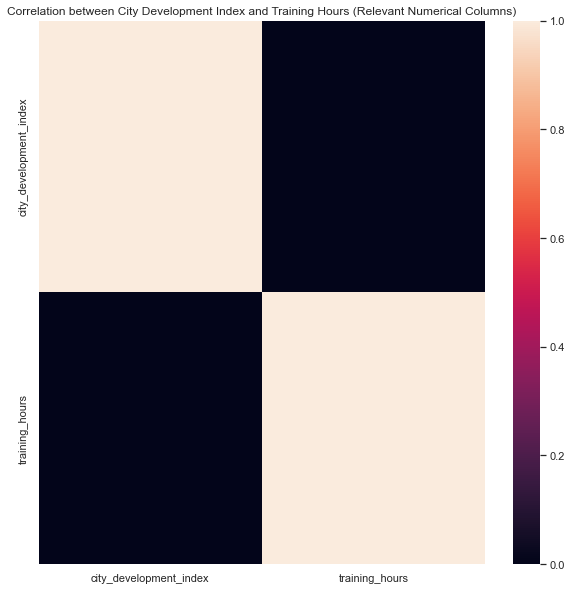

In [20]:
corr = df.drop(columns = ["target", "enrollee_id", "city_development_matrics"]).corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr).set(title = "Correlation between City Development Index and Training Hours (Relevant Numerical Columns)")

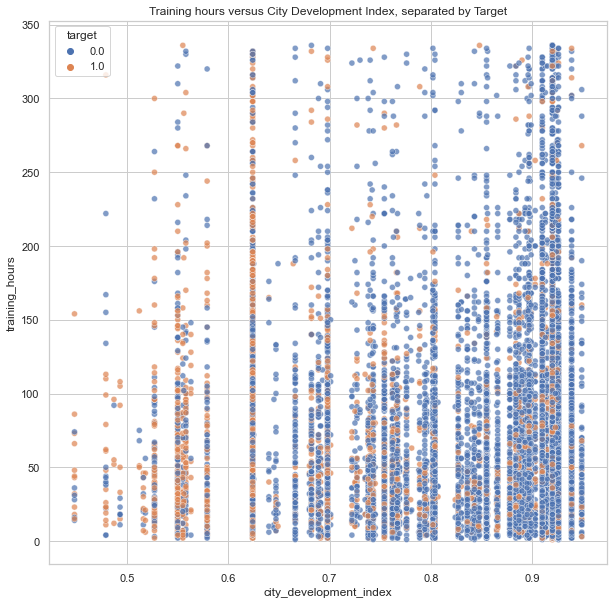

In [21]:
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = "city_development_index", y = "training_hours", hue = "target", palette = "deep", alpha = 0.7).set(title = "Training hours versus City Development Index, separated by Target")
plt.show()

Both the Histogram and the scatterplot show no correlation between  the city development index and training hours. Both distributions could be normalized in the future, but the features should not be combined.

Outliers: (5)
Use boxplot or any other strategies to find outliers

<AxesSubplot:xlabel='training_hours'>

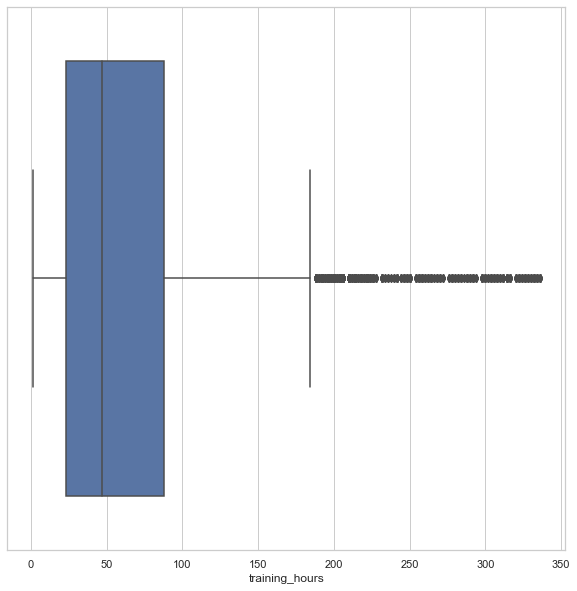

In [22]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df, x = "training_hours")

<AxesSubplot:xlabel='city_development_index'>

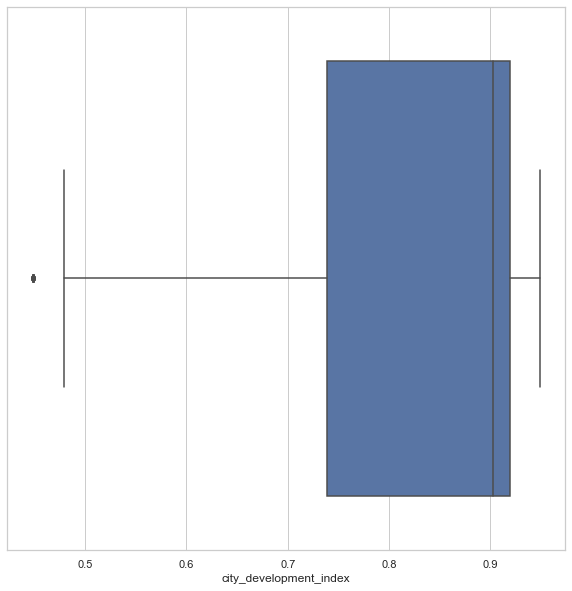

In [23]:
plt.figure(figsize = (10,10))
sns.boxplot(data = df, x = "city_development_index")

Outliers are outside the whiskers of the box plots

What are the different values of experience, can you categorize them in to 0, 1, and 2? (5 pts)  

In [24]:
df["experience"].unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

The only way experience could be categorized as 0,1,2 is if Chunks were made like 0-7 years, 8-15, 15+

Summary and discussion: (15 pts) <br>
Finally after all the above EDA, summarize your finding, next course of action such as we may need to transform distribution because of right skew etc, need to remove a particular columns for any reasons, remove records for any reasons, need to rebalance data and what are the rebalancing options (if needed), and any other finding.

### Remarks
Dataset has 9 usefull categorical features and 2 useful numerical features, with Target being the categorical class we want to predict. The major discipline column have a supermajority of individuals classified as STEM, such that any other classification takes up a insignificant part of the dataset. It may be useful to drop this feature all together. Enrollment and relevant experience seem to have a potential effect on the target value, and should be investigated further. There is no correlation between the 2 numerical features, city development index and training hours, but based on the scatterplot, more individuals looking for a job change seem to be in cities with a lower development score while those satisfied with their current position seem to be in cities with better development. There seems to be no bearing on training hours affecting the desire for job change. Because of the amount of outliers in training hours and its lack of apparent correlation, it is a candidate for removal if it will improve model performance to do so. For the categorical data, onhe-hot encoding should be performed so the data can be processed for the model. The distribution for city development score should be transformed since it is left skewed, with a local maxima near 6.0. Columns with large amounts of null values are candidates to be dropped, as based on the histograms, they may not contain relevant information for the model and dropping the rows with null values would lead to a massive loss of information. For the other columns with less nan values, the rows can be dropped instead which will still preserve most of the size of the dataset. Rows where target is null can be separated into another dataset as this can be used to predict on in the future.